# Library Installation

In [1]:
!pip install vecstack
!pip -q install shap
!pip -q install lime
!pip -q install eli5
!pip install tpot
!pip install hyperopt

  Created wheel for vecstack: filename=vecstack-0.3.0-cp36-none-any.whl size=19435 sha256=9b686ab2ebb6ab44630eaf8d82b1c5ae77c012320ef4419fde3411f830942144
  Stored in directory: /root/.cache/pip/wheels/35/6d/ca/bce17942bcf7c267b13c97c9c95e2f0ecf0b42160e6074f448
Successfully built vecstack
     |████████████████████████████████| 235kB 2.8MB/s 
     |████████████████████████████████| 276kB 2.9MB/s 
     |████████████████████████████████| 102kB 3.7MB/s 
     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 153kB 8.5MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=b4355fed60d065e3b11f7da8f3198c6466a55103d7ec10f3e0822046e67cbb39
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


# Library & Data Loading

In [0]:
#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/Mineria/Titanic/master/csv/train.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Preproccesing

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/Mineria/Titanic/master/csv/train.csv")

# Drop Ticket & Cabin 
data = data.drop(['Ticket', 'Cabin'], axis=1)

# Get the title from name
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
data['Title'] = data['Title'].map(title_mapping)
data = data.drop(['Name', 'PassengerId'], axis=1)

#Change Sex to Numeric
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#Add Family Size 
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

#Imputing Missing Value 
data['Age'].fillna(data['Age'].dropna().median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].dropna().mode()[0], inplace=True)

# Categorizing Numerical Value 
# data['FareBand'] = pd.qcut(data['Fare'], 4).astype(str)
# data['AgeBand'] = pd.qcut(data['Age'], 4).astype(str)
# data = data.drop(['Fare', 'Age'], axis=1)

# Converting Embark to Number
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# 

# data['FareBand'] = data['FareBand'].map( {'(-0.001, 7.91]': 0, '(31.0, 512.329]': 3, '(7.91, 14.454]': 1, '(14.454, 31.0]':2 } ).astype(int)
# data['AgeBand'] = data['AgeBand'].map( {'(0.419, 22.0]': 0, '(35.0, 80.0]': 3, '(22.0, 28.0]': 1, '(28.0, 35.0]':2 } ).astype(int)

In [59]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,3,0
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,0
4,0,3,0,35.0,8.0500,0,1,1


#GridSearch 

In [0]:
# Change in the cateogry Type & Data Columns to make it dummy
dataDump  = data.copy()
df = dataDump.drop(['Survived','Age','Fare'], axis=1)
# df2 = df.drop([],axis = 1)
df3 = pd.DataFrame()
for col in df.columns:
    df3[col] = df[col].astype('category')
  

In [0]:
Target = ['Survived']
data1_x_bin = pd.concat([pd.get_dummies(df3), data[['Age','Fare']]],axis=1)

In [0]:
import warnings
warnings.filterwarnings('ignore')

## Simple Block to experiment all available Algorithm (Major One's, not exhustive) without setting any parameter

### BaseLine Model Selection 

In [0]:
Target = ['Survived']
data1_x_bin = pd.get_dummies(df2)

# X = data1_x_bin
# y = Target
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data[Target]  # Y 

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1_x_bin, data[Target], cv  = cv_split,return_train_score=True,scoring='f1')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1_x_bin, data[Target])

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(data1_x_bin)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare

#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.766539,0.75113,0.0585884,0.215971,-1.54092
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.761789,0.745649,0.0751322,0.0156573,-1.61405
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.758387,0.744796,0.0796069,0.00728023,-1.35911
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.755616,0.744633,0.0803181,0.00974152,-1.09829
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.755342,0.73674,0.0750242,0.0682574,-1.86014
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.778111,0.734233,0.0728604,0.0884073,-4.38778
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.787856,0.729759,0.0622455,0.102688,-5.80975
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.741273,0.727456,0.0789478,0.00395038,-1.38171
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.742633,0.725276,0.060744,0.00287285,-1.73572
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.793857,0.724976,0.0747064,0.224103,-6.88808


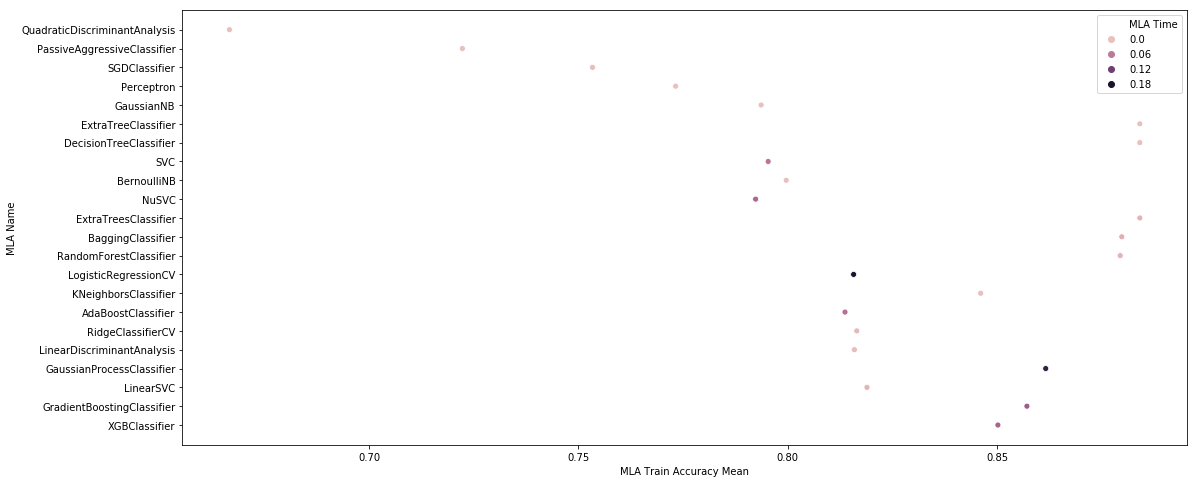

In [0]:
# sns.lineplot(x="MLA Train Accuracy Mean", y="MLA Test Accuracy Mean", hue="MLA Name", data=MLA_compare)
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
# cmap = sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.scatterplot(x="MLA Train Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))

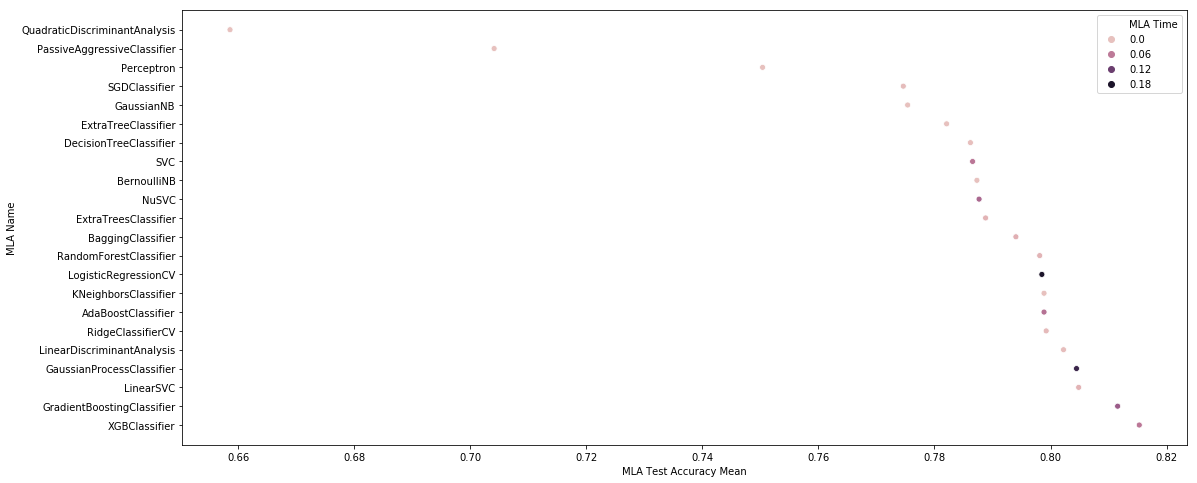

In [0]:
# sns.lineplot(x="MLA Train Accuracy Mean", y="MLA Test Accuracy Mean", hue="MLA Name", data=MLA_compare)
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
# cmap = sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.scatterplot(x="MLA Test Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))

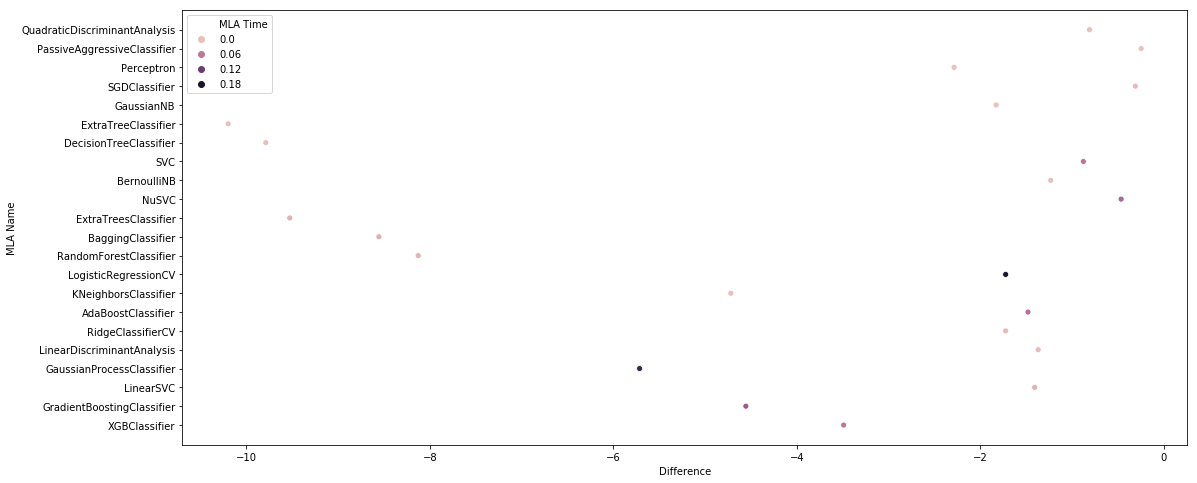

In [0]:
# sns.lineplot(x="MLA Train Accuracy Mean", y="MLA Test Accuracy Mean", hue="MLA Name", data=MLA_compare)
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
# cmap = sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.scatterplot(x="Difference", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))

In [0]:
# Get Importance Feature 

feature_names = data1_x_bin.columns
feat_imp_df = pd.DataFrame.from_dict(Feature_Importance)
feat_imp_df.index = feature_names
feat_imp_df

,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,DecisionTreeClassifier,ExtraTreeClassifier,XGBClassifier
Pclass_1,0.06,0.059057,0.048036,0.061604,0.048137,0.010885,0.039966
Pclass_2,0.02,0.032497,0.002734,0.036790,0.012339,0.040445,0.011203
Pclass_3,0.02,0.096175,0.143863,0.064954,0.119273,0.103164,0.123702
Sex_0,0.08,0.085138,0.103720,0.115706,0.006775,0.474613,0.167462
Sex_1,0.08,0.200296,0.055182,0.108410,0.000006,0.000000,0.000000
Embarked_0,0.04,0.023803,0.024619,0.022390,0.020304,0.014909,0.021709
Embarked_1,0.00,0.019971,0.009854,0.024510,0.019864,0.026697,0.014387
Embarked_2,0.04,0.017331,0.013584,0.015518,0.004617,0.021010,0.008884
Title_1,0.08,0.100969,0.417970,0.141490,0.484884,0.047264,0.411140
Title_2,0.10,0.045780,0.000706,0.039787,0.007148,0.009543,0.003464


          AdaBoostClassifier  ExtraTreesClassifier  ...  XGBClassifier   Overall
Pclass_1                 0.6              0.278595  ...       0.097208  1.612016
Pclass_2                 0.2              0.142937  ...       0.027249  0.700092
Pclass_3                 0.2              0.468184  ...       0.300875  2.201198
Sex_0                    0.8              0.411813  ...       0.407311  3.686504
Sex_1                    0.8              1.000000  ...       0.000000  2.682348

[5 rows x 8 columns]


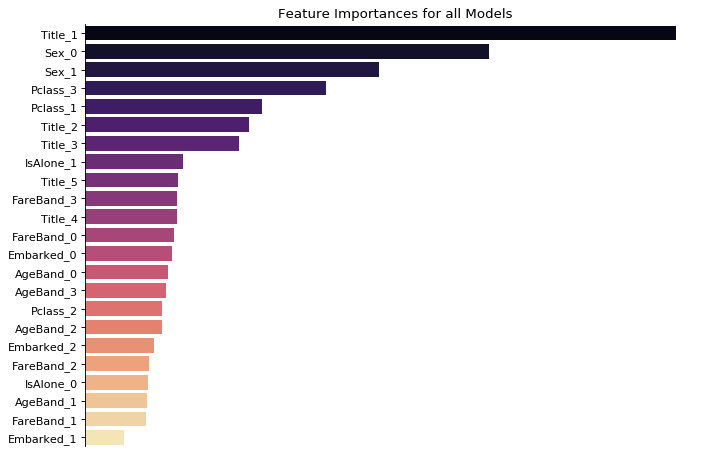

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)

scaled_fi['Overall'] = scaled_fi.sum(axis=1)
print(scaled_fi.head())
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');

In [0]:
# Re-Building the model with only top 10 Features 

scaled_sorted = scaled_fi.sort_values(by = ['Overall'], ascending = False)
scaled_sorted[:5].index
important_col = list(scaled_sorted[:10].index)
Target = ['Survived']
data1_x_bin = pd.get_dummies(df2)
data1_x_bin = data1_x_bin[important_col]

# X = data1_x_bin
# y = Target
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data[Target]

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1_x_bin, data[Target], cv  = cv_split,return_train_score=True,scoring='f1')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1_x_bin, data[Target])

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(data1_x_bin)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.74402,0.738167,0.0810449,0.00574851,-0.585302
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.744261,0.735649,0.075532,0.00384929,-0.861208
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.742557,0.733264,0.0865146,0.00842972,-0.929322
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.743593,0.732226,0.0721803,0.160003,-1.13673
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.75131,0.717311,0.10616,0.012731,-3.39989
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.731859,0.716565,0.0714244,0.0625247,-1.52931
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.7164,0.716468,0.158105,0.0034765,0.00677796
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.749807,0.716102,0.0970882,0.013445,-3.37042
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.720822,0.715725,0.0611055,0.00307727,-0.509727
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.741237,0.713282,0.0804083,0.225216,-2.79547


## Running the Model through Grid Search 

In [0]:
# Helper Class for Initilizing GridSearch

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
        self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier']

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=True):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs  
            self.best_params[key]  = str(gs.best_params_)
            if key in self.FeatureImportanceAlgo:
              self.feature_importance[key]= gs.best_estimator_ .feature_importances_

            # print (gs.best_params_.feature_importances_ )
            # try:
            #   print(gs.best_params_.feature_importances_ )
            #   self.feature_importance[key]= gs.best_params_.feature_importances_ 
            # except AttributeError:
            #   pass

    def returnBestParamDF(self):
      d = self.best_params
      BestParamDF = pd.DataFrame.from_dict([d.keys(), d.values()]).T
      return BestParamDF

    # def Feature_Importance(self):
    #   for each

    # def returnFeatureImportance(self):


    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

models1 = {
    
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNNClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
    
}

params1 = {
    'LogisticRegression': { "C":np.logspace(-3,3,7), "penalty":["l1","l2"] },  # l1 lasso l2 ridge
    'DecisionTreeClassifier': {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'KNNClassifier':{ 'n_neighbors': [5,10,15,20], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [0]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(data1_x_bin, data[Target], scoring='f1', n_jobs=-1)

# To run with important column
# ImpCol = ['','']
# helper1.fit(data1_x_bin[ImpCol], data[Target], scoring='f1', n_jobs=-1)

Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for KNNClassifier.
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished


In [0]:
feature_names = data1_x_bin.columns
feat_imp_df = pd.DataFrame.from_dict(helper1.feature_importance)
feat_imp_df.index = feature_names
feat_imp_df

,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
Pclass_1,0.046975,0.065934,0.056755,0.052706
Pclass_2,0.000000,0.030994,0.044742,0.000442
Pclass_3,0.143695,0.074674,0.084682,0.146644
Sex_0,0.000000,0.104021,0.197394,0.043064
Sex_1,0.000000,0.075462,0.130755,0.000387
Embarked_0,0.021331,0.035943,0.029304,0.015294
Embarked_1,0.002157,0.023004,0.017240,0.016626
Embarked_2,0.000000,0.017713,0.015157,0.011113
Title_1,0.618692,0.194118,0.117455,0.534040
Title_2,0.005103,0.033469,0.040612,0.003640


          DecisionTreeClassifier  ...   Overall
Pclass_1                0.075926  ...  0.749859
Pclass_2                0.000000  ...  0.324627
Pclass_3                0.232256  ...  1.274630
Sex_0                   0.000000  ...  1.592772
Sex_1                   0.000000  ...  1.012021

[5 rows x 5 columns]


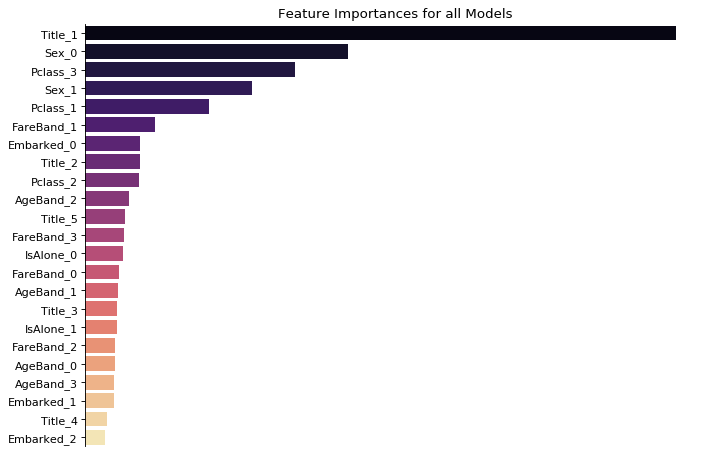

In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)

scaled_fi['Overall'] = scaled_fi.sum(axis=1)
print(scaled_fi.head())
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');

In [0]:
helper1.score_summary(sort_by='max_score')

LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
KNNClassifier
SVC
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier


,estimator,min_score,mean_score,max_score,std_score,C,algorithm,criterion,gamma,kernel,learning_rate,max_depth,min_samples_leaf,n_estimators,n_neighbors,penalty,splitter
69,SVC,0.717489,0.735555,0.761905,0.0190551,10,NaN,NaN,NaN,linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,KNNClassifier,0.704846,0.736973,0.760976,0.0236241,NaN,brute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
7,LogisticRegression,0.700935,0.733944,0.759825,0.0245646,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN
8,LogisticRegression,0.7109,0.733234,0.757709,0.0191695,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
13,LogisticRegression,0.7109,0.734262,0.757709,0.0191097,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN
12,LogisticRegression,0.7109,0.734262,0.757709,0.0191097,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
11,LogisticRegression,0.7109,0.734262,0.757709,0.0191097,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN
10,LogisticRegression,0.7109,0.734262,0.757709,0.0191097,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN
9,LogisticRegression,0.7109,0.736663,0.757709,0.0193984,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l2,NaN
6,LogisticRegression,0.700935,0.730756,0.757709,0.0232667,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,NaN


In [0]:
helper1.returnBestParamDF()

,0,1
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l1'}"
1,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."
2,RandomForestClassifier,{'n_estimators': 32}
3,KNNClassifier,"{'algorithm': 'auto', 'n_neighbors': 10}"
4,SVC,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
5,ExtraTreesClassifier,{'n_estimators': 32}
6,AdaBoostClassifier,{'n_estimators': 16}
7,GradientBoostingClassifier,"{'learning_rate': 1.0, 'n_estimators': 16}"


In [0]:
# Get best 

#Stacking

## Voting Classifier  - Soft & Hard Voting

If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [0]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    
    ('rfc', ensemble.RandomForestClassifier()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier()),
   ('lgbm',LGBMClassifier())

]

seed = 123
skf = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = seed )
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1_x_bin, data[Target], cv  = skf,scoring='f1')
vote_hard.fit(data1_x_bin, data[Target])
#print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1_x_bin, data[Target], cv  = skf,scoring='f1')
vote_soft.fit(data1_x_bin, data[Target])

#print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Test w/bin score mean: 72.93
Hard Voting Test w/bin score 3*std: +/- 8.33
----------
Soft Voting Test w/bin score mean: 73.56
Soft Voting Test w/bin score 3*std: +/- 8.10
----------


## MLExtend 

In [0]:
from mlxtend.classifier import StackingClassifier
lgbm_cl = LGBMClassifier(random_state=seed)
rf_cl = RandomForestClassifier(10, random_state=seed)
gdb_cl = GradientBoostingClassifier(random_state=seed)
logreg = LogisticRegression()
sclf = StackingClassifier(classifiers=[lgbm_cl, rf_cl,gdb_cl],
                          meta_classifier=logreg)


scores = model_selection.cross_val_score(sclf, data1_x_bin, data[Target], 
                                              cv=3, scoring='f1')
print("Accuracy: %0.2f (+/- %0.2f)" 
      % (scores.mean(), scores.std()))
    

# label = ['LGBM', 'Random Forest','GDB' 'Stacking Classifier']
# clf_list = [lgbm_cl, rf_cl,gdb_cl, logreg]

# for clf, label in zip([lgbm_cl, rf_cl,gdb_cl,sclf], 
#                       ['LGBM', 
#                        'Random Forest', 
#                        'GDB',
#                        'StackingClassifier']):

#     scores = model_selection.cross_val_score(clf, data1_x_bin, data[Target], 
#                                               cv=3, scoring='f1')
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
#           % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.02)


## VecStack 

In [0]:
from vecstack import stacking
from sklearn.model_selection import train_test_split
from sklearn import metrics

#1st level model
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)

models = [lgbm_cl,rf_cl,gdb_cl]
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = metrics.f1_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)



task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LGBMClassifier]
    fold  0:  [0.78014184]
    fold  1:  [0.74324324]
    fold  2:  [0.77037037]
    fold  3:  [0.67716535]
    ----
    MEAN:     [0.74273020] + [0.04019522]
    FULL:     [0.74410163]

model  1:     [RandomForestClassifier]
    fold  0:  [0.75912409]
    fold  1:  [0.76433121]
    fold  2:  [0.76811594]
    fold  3:  [0.67716535]
    ----
    MEAN:     [0.74218415] + [0.03767411]
    FULL:     [0.74418605]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.79710145]
    fold  1:  [0.72602740]
    fold  2:  [0.79104478]
    fold  3:  [0.67716535]
    ----
    MEAN:     [0.74783474] + [0.04940657]
    FULL:     [0.74862385]



In [0]:
#2nd level model
# Initialize 2nd level model
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % metrics.f1_score(y_test, y_pred))

Final prediction score: [0.64814815]


In [0]:
#New Experiment 

#Level 1
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)

models = [
    ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                         n_estimators=100, max_depth=3),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and vote
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=metrics.f1_score,      # metric: callable
                           n_folds=4,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)      

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.74015748]
    fold  1:  [0.69696970]
    fold  2:  [0.71212121]
    fold  3:  [0.72992701]
    ----
    MEAN:     [0.71979385] + [0.01656178]
    FULL:     [0.71969697]

model  1:     [RandomForestClassifier]
    fold  0:  [0.75000000]
    fold  1:  [0.69696970]
    fold  2:  [0.73134328]
    fold  3:  [0.74820144]
    ----
    MEAN:     [0.73162860] + [0.02129254]
    FULL:     [0.73170732]

model  2:     [XGBClassifier]
    fold  0:  [0.68421053]
    fold  1:  [0.76190476]
    fold  2:  [0.73600000]
    fold  3:  [0.77611940]
    ----
    MEAN:     [0.73955867] + [0.03504325]
    FULL:     [0.74148297]



In [0]:
#2nd level model
# Initialize 2nd level model
# model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
#                       n_estimators=100, max_depth=3)
    
model = LogisticRegression()
# model = KNeighborsClassifier(n_neighbors=5)
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % metrics.f1_score(y_test, y_pred))

Final prediction score: [0.67213115]


# Creating API of Model 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

from sklearn.externals import joblib
joblib.dump(lr, 'model.pkl')

['model.pkl']

In [0]:
# Loading Model 

lr = joblib.load('model.pkl')
print('Final prediction score: [%.8f]' % metrics.f1_score(y_test, lr.predict(X_test)))

Final prediction score: [0.76388889]


In [0]:
data1_x_bin[:10].to_csv("testing_data.csv")

In [0]:
list(data1_x_bin[:10].columns)

['Title_1',
 'Sex_0',
 'Sex_1',
 'Pclass_3',
 'Pclass_1',
 'Title_2',
 'Title_3',
 'IsAlone_1',
 'Title_5',
 'FareBand_3']

In [0]:
str(lr.predict(data1_x_bin[:10]))

'[0 1 1 1 0 0 0 0 1 1]'

In [0]:
%%writefile server.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
from flask import Flask, request, jsonify
from sklearn.externals import joblib
import traceback
import pandas as pd
import numpy as np
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))


from flask import Flask, jsonify
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
     json_ = request.get_json()
     lr = joblib.load("model.pkl")
     Columns = ['Title_1',
 'Sex_0',
 'Sex_1',
 'Pclass_3',
 'Pclass_1',
 'Title_2',
 'Title_3',
 'IsAlone_1',
 'Title_5',
 'FareBand_3']

    #  query_df = pd.DataFrame(json_)
     query_df = pd.read_csv("testing_data.csv",index_col=None)
     query_df = query_df[Columns]
    #  query = pd.get_dummies(query_df)
     print (query_df)
     prediction = lr.predict(query_df)
     return str(prediction)

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345 # If you don't provide any port the port will be set to 12345
    global lr
    lr = joblib.load("model.pkl") # Load "model.pkl"
    print ('Model loaded')
    # test_data = pd.read_csv("testing_data.csv")
    # return lr.predict(test_data)
    app.run(threaded=True,debug=True,port=8888)

Overwriting server.py


In [0]:
import os
import subprocess
import sys
import time
import socket
# Start a subprocess that runs the Flask server
p = subprocess.Popen([sys.executable, "-m", "flask", "run"], env=dict(**os.environ, FLASK_APP="server.py"), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Start two subthreads that forward the output from the Flask server to the output of the Jupyter notebook
def forward(i, o):
    while p.poll() is None:
        l = i.readline().decode('utf-8')
        if l:
            o.write("[SERVER] " + l)

import threading
threading.Thread(target=forward, args=(p.stdout, sys.stdout)).start()
threading.Thread(target=forward, args=(p.stderr, sys.stderr)).start()
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))
# sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
# Let's give the server a bit of time to make sure it has started
time.sleep(2)

172.28.0.2
[SERVER]  * Serving Flask app "server.py"
[SERVER]  * Environment: production
[SERVER]    WARNING: This is a development server. Do not use it in a production deployment.
[SERVER]    Use a production WSGI server instead.
[SERVER]  * Debug mode: off


[SERVER] /usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
[SERVER]   warnings.warn(msg, category=DeprecationWarning)
[SERVER]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [0]:
import requests
# r = requests.get("http://172.28.0.2/")
r = requests.post(" http://127.0.0.1:5000/predict",data=data1_x_bin[:1].to_json())
print(r.status_code)
print(r.encoding)
print(r.apparent_encoding)
print(r.text)

200
utf-8
ascii
[0 1 1 1 0 0 0 0 1 1]


[SERVER] 127.0.0.1 - - [10/Aug/2019 04:53:16] "POST /predict HTTP/1.1" 200 -


In [0]:
!ps -fA | grep python

root          24       7  0 02:36 ?        00:00:16 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root         131      24  0 02:37 ?        00:00:54 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-0b9e8343-0347-4958-a837-a465737ae2f8.json
root         419     131  0 02:48 ?        00:00:00 /usr/bin/python3 -Wignore:::pip._internal.cli.base_command -c from multiprocessing.semaphore_tracker import main;main(58)
root        1710     131  0 04:14 ?        00:00:00 /usr/bin/python3 -Wignore:::pip._internal.cli.base_command -c from joblib.externals.loky.backend.semaphore_tracker import main; main(57)
root        1718    1710  0 04:14 ?        00:00:00 /usr/bin/python3 -Wignore:::pip._internal.cli.base_command -Wignore:::pip._internal.cli.base_command -c from multiprocessing.semaphore_tracker import main;main(0)
root        2306     131  0 04:52 ?

In [0]:
!sudo kill 2230

# Model Interpretation

In [0]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0])

## Eli5

In [0]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dtree , random_state=101).fit(X_test, y_test)      # Evaluate the permutation importance 
eli5.show_weights(perm, feature_names = X_test.columns.values)    

Weight,Feature
0.1978 ± 0.0391,Title_1
0.1285 ± 0.0158,Pclass_3
0.0469 ± 0.0251,FareBand_1
0.0201 ± 0.0336,Embarked_0
0.0179 ± 0.0192,AgeBand_2
0.0179 ± 0.0259,IsAlone_1
0.0156 ± 0.0045,Title_5
0.0145 ± 0.0114,AgeBand_0
0.0089 ± 0.0134,FareBand_2
0.0078 ± 0.0114,FareBand_0


## SHAP 

In [0]:
row_to_show = 7                                                                # The row for which we want to check the SHAP explanations
data_to_predict = X_test.iloc[row_to_show]

data_to_preddict_array = data_to_predict.values.reshape(1,-1)

dtree_pred = dtree.predict_proba(data_to_preddict_array)  

dtree.predict(data_to_preddict_array)  

array([1])

In [0]:
import shap
# Object that can calculate Shap values
explainer = shap.TreeExplainer(dtree)                                       # SHAP Tree Explainer

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict) 
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)

# AutoML -- TPOT 

In [0]:
# Import the tpot regressor
from tpot import TPOTClassifier

#100 pipelines
#5 generations
# Create a tpot object with a few parameters
tpot = TPOTClassifier(generations=50,scoring ='f1', 
                    max_time_mins = 120, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 3)

# Convert to numpy arrays
training_features = np.array(X_train)


# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(y_train).reshape((-1,))

# Fit the tpot model on the training data
tpot.fit(training_features, training_targets)

Generation 1 - Current best internal CV score: 0.7336980019564289
Generation 2 - Current best internal CV score: 0.7351049283633553
Generation 3 - Current best internal CV score: 0.741086509958878
Generation 4 - Current best internal CV score: 0.741086509958878
Generation 5 - Current best internal CV score: 0.741086509958878
Generation 6 - Current best internal CV score: 0.741086509958878
Generation 7 - Current best internal CV score: 0.741086509958878
Generation 8 - Current best internal CV score: 0.741086509958878
Generation 9 - Current best internal CV score: 0.741086509958878
Generation 10 - Current best internal CV score: 0.741086509958878
Generation 11 - Current best internal CV score: 0.741086509958878
Generation 12 - Current best internal CV score: 0.7429429124021681


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(RFE(StandardScaler(input_matrix), criterion=entropy, max_features=1.0, n_e

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=3,
               disable_update_check=False, early_stop=None, generations=1000000,
               max_eval_time_mins=5, max_time_mins=120, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring='f1', subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [0]:
# Show the final model
print(tpot.fitted_pipeline_)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rfe',
                 RFE(estimator=ExtraTreesClassifier(bootstrap=False,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=1.0,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_...
                                                   

In [0]:
# Evaluate the final model
print(tpot.score(X_test, y_test))

0.7883211678832117


In [75]:
len(data1_x_bin.columns)

17

In [76]:
from sklearn.model_selection import train_test_split

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)


from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='f1').mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,30)),
    'max_features': hp.choice('max_features', range(1,18)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

new best:
0.7395625597872789
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 4, 'n_estimators': 393}
new best:
0.7455436278557666
{'criterion': 'entropy', 'max_depth': 22, 'max_features': 15, 'n_estimators': 425}
new best:
0.7582310539645433
{'criterion': 'entropy', 'max_depth': 27, 'max_features': 15, 'n_estimators': 421}
new best:
0.7582310539645433
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 14, 'n_estimators': 187}
new best:
0.7582310539645433
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 13, 'n_estimators': 198}
new best:
0.7582310539645433
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 15, 'n_estimators': 387}
new best:
0.7582310539645433
{'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'n_estimators': 375}
new best:
0.7596484570163892
{'criterion': 'entropy', 'max_depth': 21, 'max_features': 16, 'n_estimators': 414}
new best:
0.7596484570163892
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 7, 'n_estimators': 349}

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)


def hyperopt_train_test(params):
    # X_ = X_train[:]
    # if 'normalize' in params:
    #     if params['normalize'] == 1:
    #         X_ = normalize(X_)
    #         del params['normalize']
    # if 'scale' in params:
    #     if params['scale'] == 1:
    #         X_ = scale(X_)
    #         del params['scale']
    clf = SVC(**params)
    return cross_val_score(clf,X_train, y_train, scoring='f1').mean()

space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20)
    # 'scale': hp.choice('scale', [0, 1]),
    # 'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)


100%|██████████| 100/100 [00:06<00:00, 14.36it/s, best loss: -0.7391300353681504]
best:
{'C': 17.556236531888423, 'gamma': 0.4575404936093941, 'kernel': 3}


In [78]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, data1_x_bin, data[Target], scoring = 'f1').mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }
])
count = 0
best = 0
def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print ('new best:', acc, 'using', params['type'])
        best = acc
    if count % 50 == 0:
        print ('iters:', count, ', acc:', acc, 'using', params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=1500, trials=trials)
print ('best:')
print (best)

new best:
0.17475060199518402
using
svm
new best:
0.4815988817636745
using
knn
new best:
0.4880350916428622
using
knn
new best:
0.5133701509170846
using
knn
new best:
0.7223331820991307
using
naive_bayes
new best:
0.735555426138386
using
svm
  2%|▏         | 35/1500 [25:03<17:28:49, 42.96s/it, best loss: -0.735555426138386]


KeyboardInterrupt: ignored

In [18]:
!pip install hpsklearn

  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-cp36-none-any.whl size=23915 sha256=cc848078e9a44ff16c4e55cba6416dcbd14a7bed03bd8d36e31752590f8c78bd
  Stored in directory: /root/.cache/pip/wheels/41/ee/c4/3c267cbf78f0905434ee36b915d97a20610ad3af7ff3c75852
Successfully built hpsklearn


In [79]:
#@title Install the facets_overview pip package.
!pip install facets-overview

In [0]:
import pandas as pd
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"]
train_data = X_train
test_data = X_test

In [81]:
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = train_data.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))